# CS3300 Lab 1: Data Cleaning
#### Jackson Rolando

## 1. Loading the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_rets = pd.read_csv('./Sacramentorealestatetransactions.csv')
print(df_rets.head())
print(df_rets.info())

             street        city    zip state  beds  baths  sq__ft  \
0      3526 HIGH ST  SACRAMENTO  95838    CA     2      1     836   
1       51 OMAHA CT  SACRAMENTO  95823    CA     3      1    1167   
2    2796 BRANCH ST  SACRAMENTO  95815    CA     2      1     796   
3  2805 JANETTE WAY  SACRAMENTO  95815    CA     2      1     852   
4   6001 MCMAHON DR  SACRAMENTO  95824    CA     2      1     797   

          type                     sale_date  price   latitude   longitude  
0  Residential  Wed May 21 00:00:00 EDT 2008  59222  38.631913 -121.434879  
1  Residential  Wed May 21 00:00:00 EDT 2008  68212  38.478902 -121.431028  
2  Residential  Wed May 21 00:00:00 EDT 2008  68880  38.618305 -121.443839  
3  Residential  Wed May 21 00:00:00 EDT 2008  69307  38.616835 -121.439146  
4  Residential  Wed May 21 00:00:00 EDT 2008  81900  38.519470 -121.435768  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     No

According to the info() call, there are no fields in any of the rows with a null value. This could not be the case, since there are zeros in some of the numerical columns, which won't make sense and will need to be addressed. 

Columns like state, baths, bed, zip, and city could be use more categorically, while square footage will probably be used as a numerical variable.

The columns with types labelled "object" in the info output are assumed to be strings.

## 2. Representing Categorical Variables

This function turns a column into a dictionary, with the series's elements as the keys, and the counts of each of those elements as the value.

In [3]:
def countUnique(series):
    out_dict = {}
    for value in series:
        out_dict.setdefault(value, 0)
        out_dict[value] += 1
    return out_dict

This isolates the street names, getting rid of the address numbers and apartment numbers for a more accurate count of each street name, then uses the previous function to count

In [4]:
def isolate_street_name(address: str):
    start = address.find(' ') + 1
    end = address.find('Unit')
    return address[(start):(None if end == -1 else end - 1)]

dirty_street_names =  df_rets['street'].map(lambda address: isolate_street_name(address))
streets_dict = countUnique(dirty_street_names)
print("Counts of unique street names:")
streets_dict

Counts of unique street names:


{'HIGH ST': 3,
 'OMAHA CT': 1,
 'BRANCH ST': 1,
 'JANETTE WAY': 1,
 'MCMAHON DR': 1,
 'PEPPERMILL CT': 1,
 'OGDEN NASH WAY': 1,
 '19TH AVE': 1,
 'TRINITY RIVER DR': 1,
 '10TH ST': 1,
 'MORRISON AVE': 3,
 'FAWN CIR': 1,
 'LA ROSA RD': 1,
 'KIRK WAY': 1,
 'LOCH HAVEN WAY': 2,
 'HAMDEN PL': 1,
 '6TH ST': 3,
 'LONGFORD DR': 2,
 'PERALTA AVE': 1,
 'LEEWILL AVE': 1,
 'STONEHAND AVE': 1,
 'BANDALIN WAY': 1,
 'OAKVALE CT': 1,
 'PASTURE CT': 1,
 'BAINBRIDGE DR': 1,
 'BLACKFOOT WAY': 1,
 'NORTON WAY': 1,
 'JANRICK AVE': 1,
 'CULP WAY': 1,
 'CREEK VALLEY CIR': 1,
 'LAGUNA OAKS DR': 5,
 'MEDORA DR': 1,
 'EXPLORER DR': 1,
 'DOMINION WAY': 1,
 'SHINING STAR DR': 2,
 'CORVAIR ST': 1,
 'NIXOS WAY': 1,
 'CARTHY WAY': 1,
 'LARKSPUR LN': 1,
 'WESTLAKE PKWY': 2,
 '63RD AVE': 1,
 'ELK WAY': 1,
 'RIDGEPOINT DR': 1,
 'KOALA CT': 1,
 'ERIN DR': 1,
 'SUNBLAZE WAY': 1,
 'ALIX PKWY': 1,
 'NATOMA WAY': 1,
 'GREEN TREE DR': 1,
 'SARA ST': 1,
 'HALBRITE WAY': 1,
 'KALLIE KAY LN': 1,
 'STEINBECK WAY': 2,
 'VALLEY GR

Counting unique zip codes:

In [5]:
countUnique(df_rets['zip'])

{95838: 37,
 95823: 61,
 95815: 18,
 95824: 12,
 95841: 7,
 95842: 22,
 95820: 23,
 95670: 21,
 95673: 13,
 95822: 24,
 95621: 28,
 95833: 20,
 95660: 21,
 95834: 22,
 95843: 33,
 95832: 12,
 95827: 9,
 95828: 45,
 95758: 44,
 95626: 4,
 95825: 13,
 95835: 37,
 95624: 34,
 95632: 21,
 95826: 18,
 95608: 20,
 95662: 11,
 95630: 17,
 95829: 11,
 95655: 1,
 95757: 36,
 95742: 11,
 95726: 3,
 95818: 7,
 95762: 23,
 95831: 10,
 95683: 4,
 95693: 5,
 95814: 3,
 95635: 1,
 95864: 5,
 95817: 7,
 95628: 9,
 95682: 10,
 95648: 72,
 95667: 10,
 95610: 7,
 95722: 1,
 95816: 4,
 95678: 20,
 95747: 20,
 95819: 4,
 95811: 2,
 95677: 6,
 95765: 11,
 95603: 5,
 95661: 8,
 95650: 2,
 95821: 6,
 95623: 2,
 95663: 1,
 95746: 3,
 95631: 1,
 95619: 1,
 95614: 1,
 95690: 1,
 95633: 1,
 95691: 3}

Counting unique beds:

In [6]:
countUnique(df_rets['beds'])

{2: 133, 3: 413, 1: 10, 4: 258, 0: 108, 5: 59, 8: 1, 6: 3}

The street name and zip codes could be converted to numerical values, but it wouldn't be very useful. Aggregations of either set wouldn't make sense, nor would an average. Street names are arbitrarily decided, there is no scale to move along. Beds could be either. They could be categorical, but it makes sense to use them as a numerical value, as it would be a reassonable assumption that the price of a property would generally go up with the number of beds. It could be useful as a categorical value as well, since an intermediate value like 3.5 beds wouldn't make much sense.

This cell converts the city, state, zip, beds, baths, and type columns to the categorical type:

In [7]:
cols = ['city', 'state', 'zip', 'beds', 'baths', 'type']
df_rets[cols] = df_rets[cols].astype('category')
df_rets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   street     985 non-null    object  
 1   city       985 non-null    category
 2   zip        985 non-null    category
 3   state      985 non-null    category
 4   beds       985 non-null    category
 5   baths      985 non-null    category
 6   sq__ft     985 non-null    int64   
 7   type       985 non-null    category
 8   sale_date  985 non-null    object  
 9   price      985 non-null    int64   
 10  latitude   985 non-null    float64 
 11  longitude  985 non-null    float64 
dtypes: category(6), float64(2), int64(2), object(2)
memory usage: 56.9+ KB


## 3. Cleaning Continuous Variables

Here is a histogram of square footage, latitudes, and longitudes:

/tmp/ipykernel_57445/1110506770.py:1: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_rets.hist(column=['sq__ft', 'latitude', 'longitude'], bins=20, layout=(1, 3), ax=plt.figure(figsize = (15, 6)).gca())


array([[<AxesSubplot: title={'center': 'sq__ft'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'longitude'}>]], dtype=object)

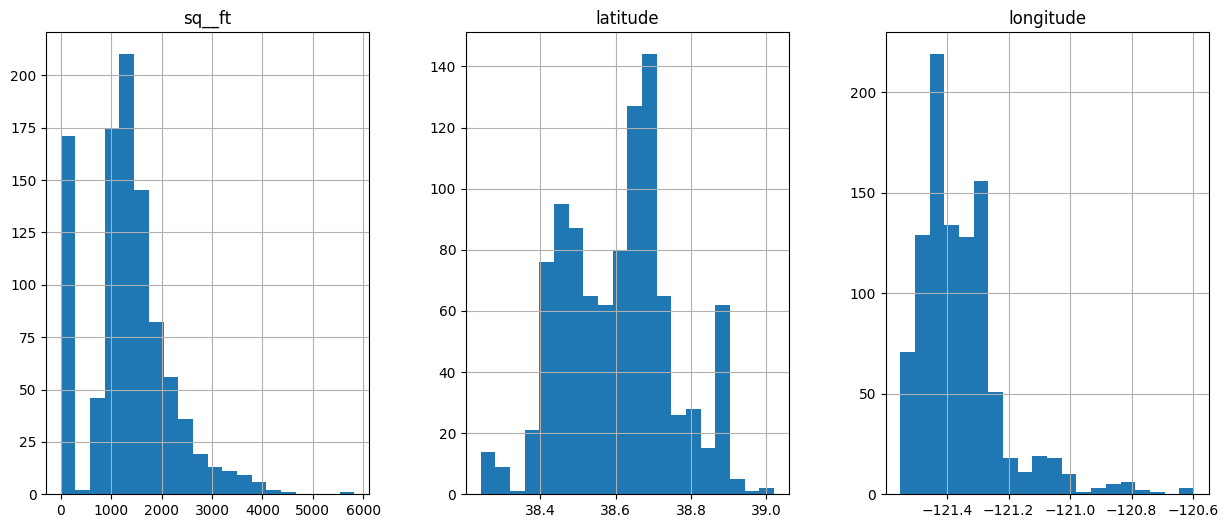

In [8]:
df_rets.hist(column=['sq__ft', 'latitude', 'longitude'], bins=20, layout=(1, 3), ax=plt.figure(figsize = (15, 6)).gca())

A histogram with ranged buckets to show counts makes sense here. 

The square footage histogram seems to have a spike way down low. Are these just zero values?

In [10]:
df_rets.sq__ft[df_rets.sq__ft == 0].count()

171

There seems to be 171 proprties whose value for square footage is 0. If nothing is built on the property this makes sense, but it could cause odd results when combined with the non-empty lots, so it'll have to be addressed for certain calculations.

## 4. Cleaning Categorical Variables

Here are histograms for the categorical columns:

TypeError: no numeric data to plot

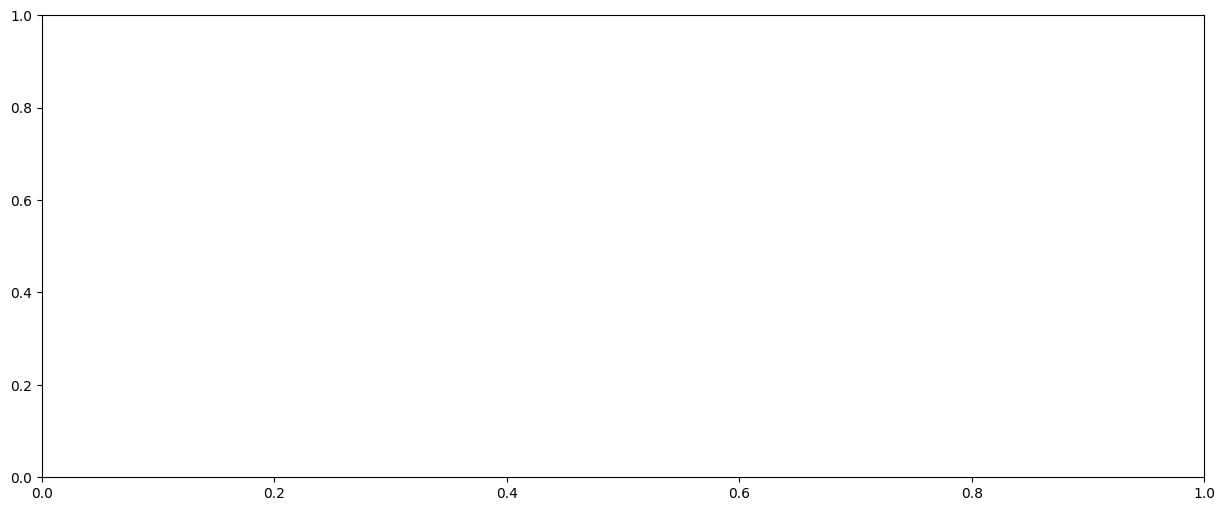

In [13]:
df_rets.plot.bar